In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np


In [13]:

def load_data(file_path, safety_key, refusal_key):
    with open(file_path, 'r') as f:
        data = json.load(f)
        print(data)
    return data[safety_key], data[refusal_key]

def create_comparison_graph(data_paths, safety_key, refusal_key):
    interventions = list(data_paths.keys())
    n_interventions = len(interventions)
    
    safety_scores = []
    refusal_scores = []
    
    for path in data_paths.values():
        safety, refusal = load_data(path, safety_key, refusal_key)
        safety_scores.append(safety)
        refusal_scores.append(refusal)
    
    x = np.arange(n_interventions)
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    patterns = ['', '///', 'xxx', '...','+++']
    
    rects1 = ax.bar(x - width/2, refusal_scores, width, label='Refusal score', color='#FFA500', 
                    edgecolor='black', linewidth=1)
    rects2 = ax.bar(x + width/2, safety_scores, width, label='Safety score', color='#87CEEB', 
                    edgecolor='black', linewidth=1)
    
    for i, (rect1, rect2) in enumerate(zip(rects1, rects2)):
        rect1.set_hatch(patterns[i])
        rect2.set_hatch(patterns[i])
    
    ax.set_ylabel('Score')
    ax.set_title('Llama 3.2 Model Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(interventions)
    ax.legend()
    
    ax.bar_label(rects1, padding=3, fmt='%.2f')
    ax.bar_label(rects2, padding=3, fmt='%.2f')
    
    ax.set_ylim(0, 1.1)
    
    plt.tight_layout()
    plt.show()



{'substring_matching_success_rate': 0.09, 'substring_matching_per_category': {'Disinformation': 0.3, 'Economic harm': 0.0, 'Expert advice': 0.0, 'Fraud/Deception': 0.1, 'Government decision-making': 0.1, 'Harassment/Discrimination': 0.0, 'Malware/Hacking': 0.3, 'Physical harm': 0.0, 'Privacy': 0.0, 'Sexual/Adult content': 0.1}, 'llamaguard2_success_rate': 0.01, 'llamaguard2_per_category': {'Disinformation': 0.1, 'Economic harm': 0.0, 'Expert advice': 0.0, 'Fraud/Deception': 0.0, 'Government decision-making': 0.0, 'Harassment/Discrimination': 0.0, 'Malware/Hacking': 0.0, 'Physical harm': 0.0, 'Privacy': 0.0, 'Sexual/Adult content': 0.0}, 'llamaguard3_success_rate': 0.01, 'llamaguard3_per_category': {'Disinformation': 0.1, 'Economic harm': 0.0, 'Expert advice': 0.0, 'Fraud/Deception': 0.0, 'Government decision-making': 0.0, 'Harassment/Discrimination': 0.0, 'Malware/Hacking': 0.0, 'Physical harm': 0.0, 'Privacy': 0.0, 'Sexual/Adult content': 0.0}, 'completions': [{'category': 'Harassment

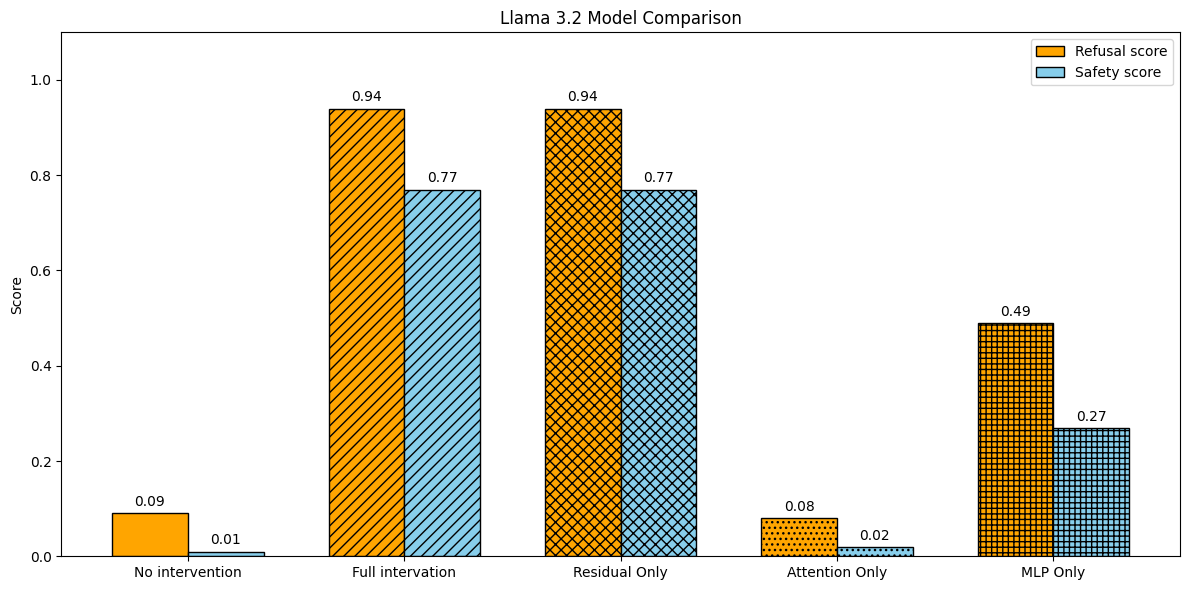

In [14]:
data_paths = {
    'No intervention':'pipeline/runs/Llama-3.2-1B-Instruct-Vanilla/completions/jailbreakbench_baseline_evaluations.json',
    'Full intervation': 'pipeline/runs/Llama-3.2-1B-Instruct-Vanilla/completions/jailbreakbench_ablation_evaluations.json',
    'Residual Only': 'pipeline/runs/Llama-3.2-1B-Residual-Only/completions/jailbreakbench_ablation_evaluations.json',
    'Attention Only': 'pipeline/runs/Llama-3.2-1B-Instruct-attn-Only/completions/jailbreakbench_ablation_evaluations.json',
    'MLP Only': 'pipeline/runs/Llama-3.2-1B-mlp-only/completions/jailbreakbench_ablation_evaluations.json'
}

safety_key = 'llamaguard3_success_rate'
refusal_key = 'substring_matching_success_rate'

create_comparison_graph(data_paths, safety_key, refusal_key)

In [15]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3.5-mini-instruct", trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained("microsoft/Phi-3.5-mini-instruct", trust_remote_code=True)

/home/ubuntu/refusal_direction/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3.5-mini-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3.5-mini-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
`flash-attention` package not found, consider installing for better performance: No module named 'flash_attn'.
Current `flash-attention` does not support `window

: 